In [27]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/pandas-data-analysis/part7/data/auto-mpg.csv'
df = pd.read_csv(url, header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [28]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [29]:
# 데이터 통계 요약정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [30]:
# 결측치 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [31]:
# 중복 데이터 확인
df.duplicated().sum()

np.int64(0)

In [32]:
# 결측치는 아니지만. 데이터 타입이 일치하지 않은 데이터들을 찾아서 na로 변경 - 일괄처리를 위해서 
# horsepower
df.loc[100,'horsepower'] = '<<'

In [41]:
df.horsepower = pd.to_numeric(df.horsepower,errors='coerce')
df.horsepower = df.horsepower.apply(lambda x : x if isinstance(x,float) else pd.NA)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [44]:
# 결측치 데이터 처리방안
# 1. 결측치가 있는 데이터의 행들을 전부 출력
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
100,18.0,6,250.0,NaN,3021.0,16.5,73,1,ford maverick
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [50]:
# 결측치는 제거
# df = df[~df.horsepower.isna()]
df = df.dropna()
# 결측치를 제거하면 index가 중간중간 비어있기 때문에 재 정렬 reset
df = df.reset_index(drop=True)

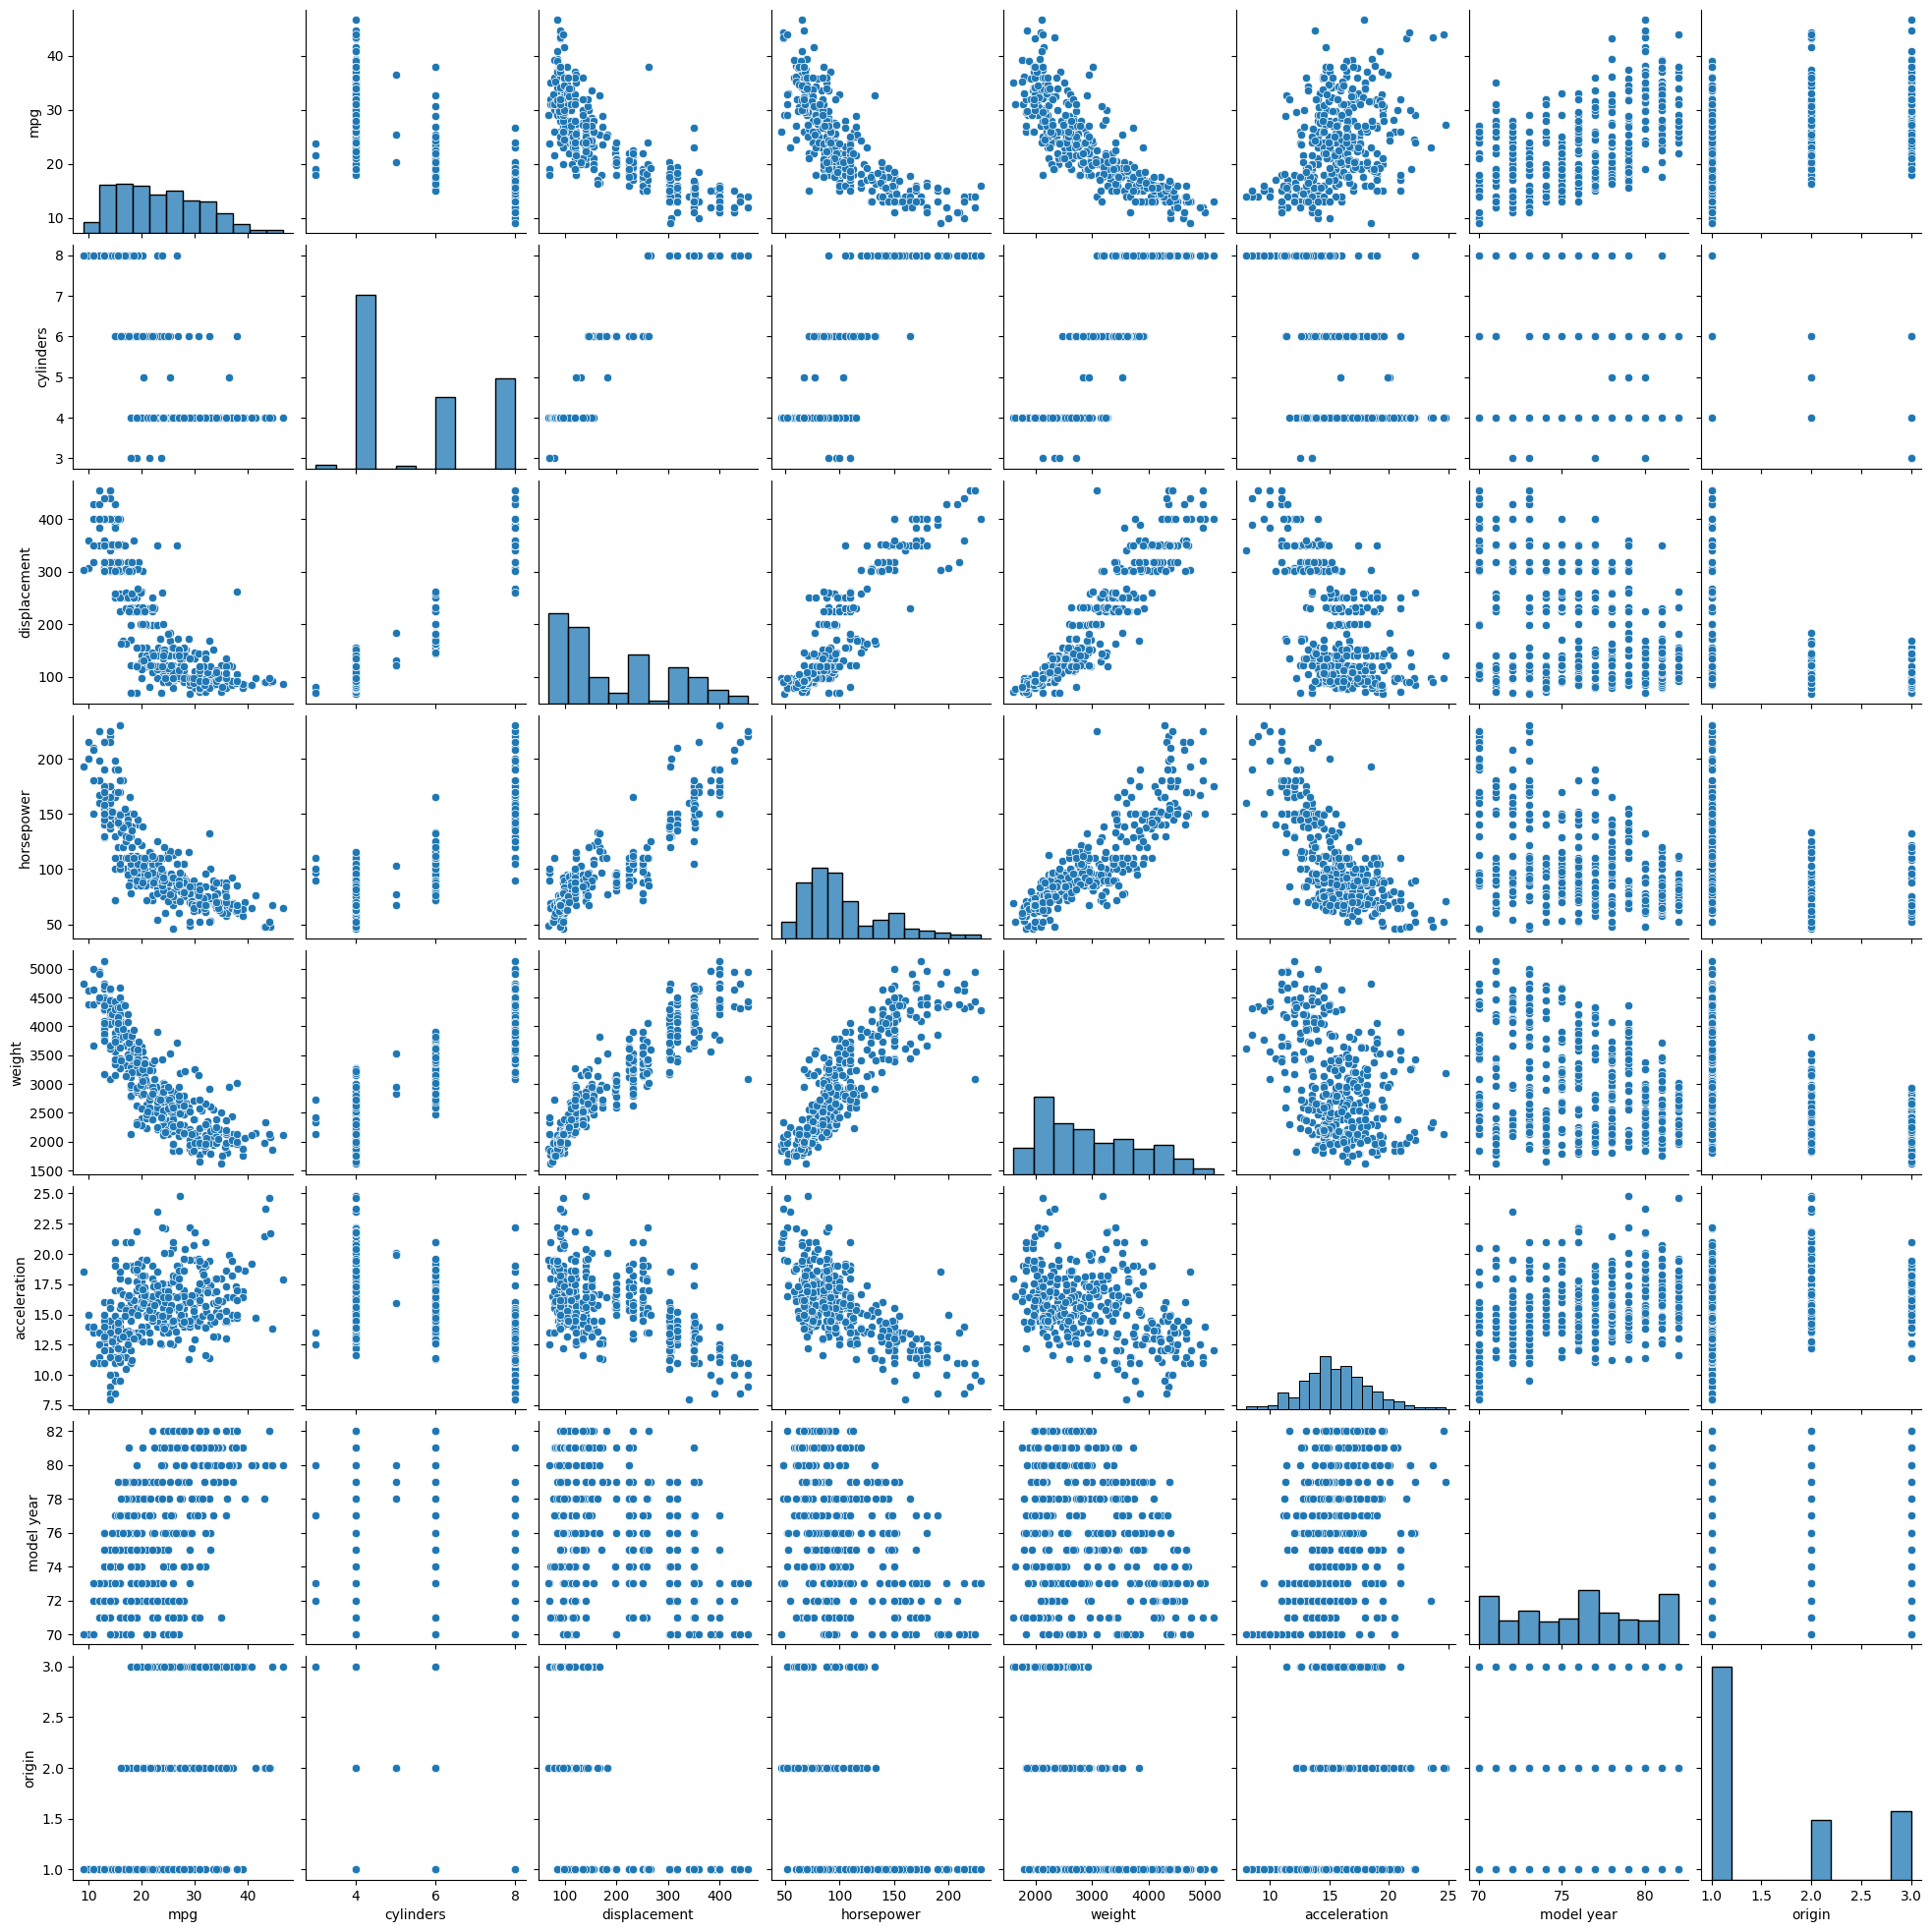

In [51]:
# seaborn pairplot   산점도
sns.pairplot(df)

In [52]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777645,-0.804970,-0.779862,-0.832675,0.424281,0.579942,0.564652
cylinders,-0.777645,1.000000,0.950862,0.843625,0.897600,-0.505099,-0.345338,-0.568807
displacement,-0.804970,0.950862,1.000000,0.898376,0.933266,-0.544555,-0.369197,-0.614186
horsepower,-0.779862,0.843625,0.898376,1.000000,0.864800,-0.689083,-0.417697,-0.456364
weight,-0.832675,0.897600,0.933266,0.864800,1.000000,-0.416951,-0.309274,-0.585298
acceleration,0.424281,-0.505099,-0.544555,-0.689083,-0.416951,1.000000,0.291326,0.213557
model year,0.579942,-0.345338,-0.369197,-0.417697,-0.309274,0.291326,1.000000,0.180313
origin,0.564652,-0.568807,-0.614186,-0.456364,-0.585298,0.213557,0.180313,1.000000


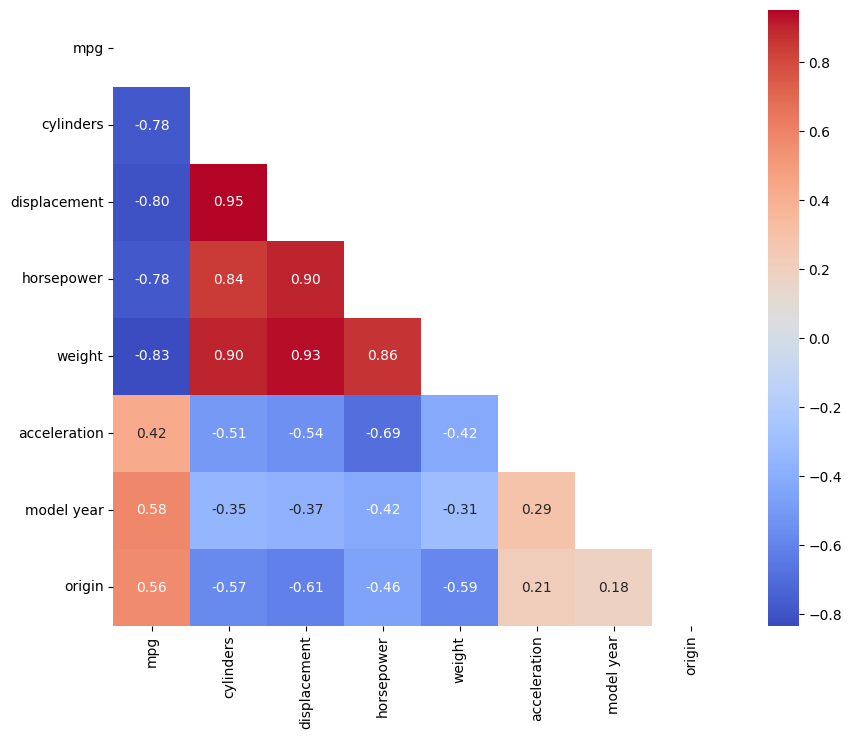

In [55]:
# 상관계수 분석 - 히트맵
mask = np.triu(np.ones_like(corr, dtype=bool))   # 마스크 생성 (상단 트라이앵글을 숨김)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

In [56]:
'''
[Step 3] 데이터 전처리
'''

# horsepower 열의 고유값 확인
df['horsepower'].unique()          

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [57]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)

# df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
# df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

df.describe()                                   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.459847,5.470588,194.269821,104.511509,2977.473146,15.538875,75.987212,1.578005
std,7.810128,1.707759,104.740164,38.531429,850.487992,2.761971,3.685361,0.806020
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2224.500000,13.750000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,94.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,284.500000,127.000000,3616.500000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [58]:
# 결측치 제거
# print(df['horsepower'].isnull().sum())
# df_nan = df.dropna(subset=['horsepower'], axis=0)                 
print(df['horsepower'].isnull().sum())

0


In [ ]:
# 결측치 대체
# print(df['horsepower'].isnull().sum())
# df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               
# print(df['horsepower'].isnull().sum())

6
0


In [59]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777645,-0.804970,-0.779862,-0.832675,0.424281,0.579942,0.564652
cylinders,-0.777645,1.000000,0.950862,0.843625,0.897600,-0.505099,-0.345338,-0.568807
displacement,-0.804970,0.950862,1.000000,0.898376,0.933266,-0.544555,-0.369197,-0.614186
horsepower,-0.779862,0.843625,0.898376,1.000000,0.864800,-0.689083,-0.417697,-0.456364
weight,-0.832675,0.897600,0.933266,0.864800,1.000000,-0.416951,-0.309274,-0.585298
acceleration,0.424281,-0.505099,-0.544555,-0.689083,-0.416951,1.000000,0.291326,0.213557
model year,0.579942,-0.345338,-0.369197,-0.417697,-0.309274,0.291326,1.000000,0.180313
origin,0.564652,-0.568807,-0.614186,-0.456364,-0.585298,0.213557,0.180313,1.000000


In [ ]:
# 수치형 데이터 선택  -displacement,acceleration,model year,origin
df.describe().columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [64]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
df = df[['mpg', 'cylinders', 'horsepower', 'weight']]
df.head() 

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


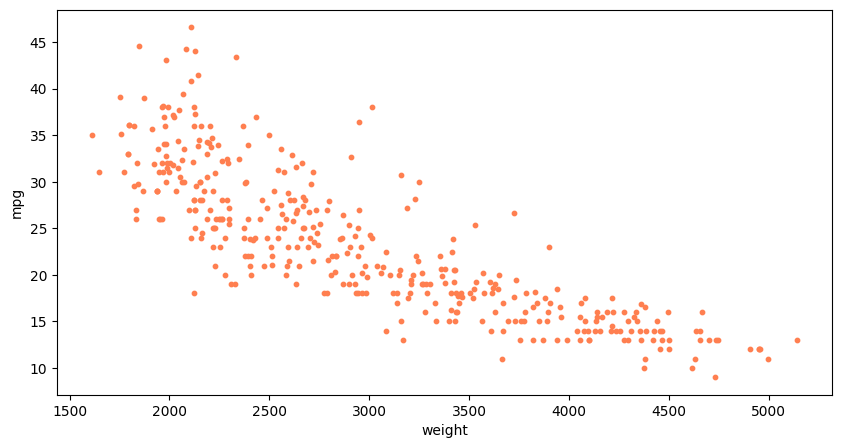

In [65]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

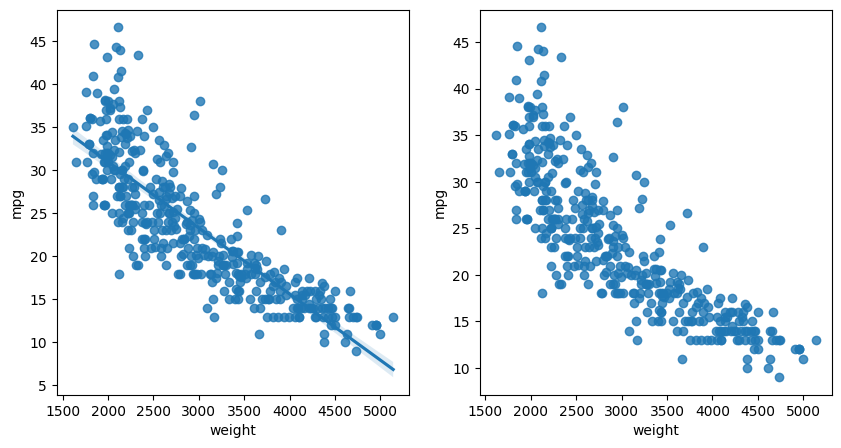

In [ ]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=df, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=df, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()

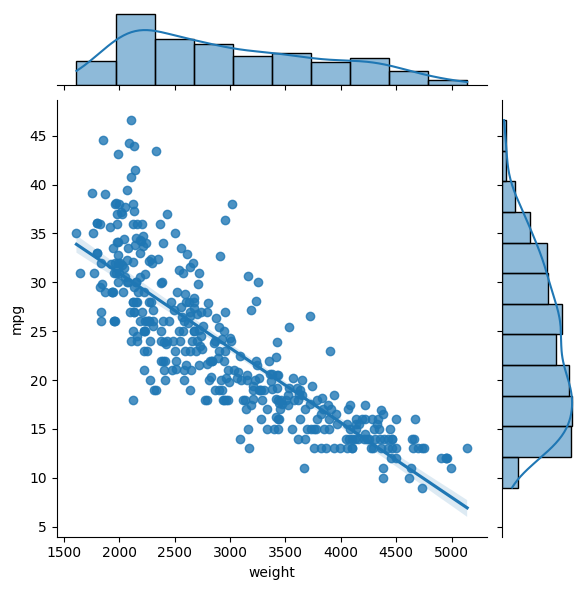

In [68]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
# sns.jointplot(x='weight', y='mpg', data=df);             # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=df);  # 회귀선 표시

In [69]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=df[['weight']]  #독립 변수 X
y=df['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print('total data 개수: ', len(X))

train data 개수:  273
test data 개수:  118
total data 개수:  391


In [71]:
'''
Step 5: 단순회귀분석 모델 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()   

# train data를 가지고 모델 학습
lr.fit(X_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.7126736741391013


In [ ]:
# 학생들의 시험점수를 예측
# 1. 참고할 정보가 없다면.... 모든학생이 평균점수를 받을 거라고 예측
# 2. 실제는 평균보다 높거나 낮다... 그래서 오차가 발생.... 결정계수의 기준선
# 선형모델의 예측 
#  정보 : 공부시간 추가정보  가 있으면 공부시간, 시험점수의 관계를 선형회귀 모델로 만듦
# 결정계수가 0이면 그냥 평균을 출력하는 의미

In [ ]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b', lr.intercept_)

# y = -0.00764998 x X + 46.449390410613006

기울기 a:  [-0.00764998]
y절편 b 46.449390410613006


In [73]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2
test_preds

,y_test,y_hat,squared_error
276,29.5,30.116677,0.380291
240,21.5,25.641437,17.151504
334,26.6,26.291686,0.095058
184,17.5,14.204713,10.858914
98,18.0,23.920191,35.048666
...,...,...,...
367,24.0,24.532190,0.283226
59,20.0,28.028232,64.452511
157,17.0,16.560908,0.192802
37,14.0,14.250613,0.062807


In [74]:
# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  16.639221882868178


In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_hat,y_test)

16.639221882868178

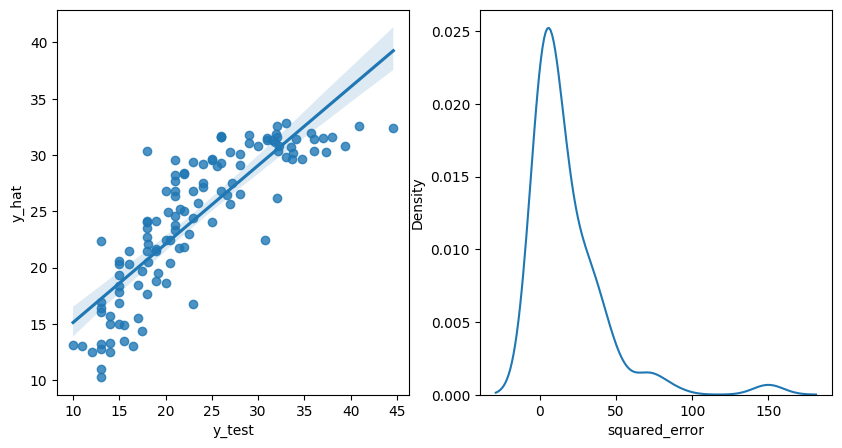

In [23]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat',  data=test_preds, ax=axes[0]);  
sns.kdeplot(x='squared_error',  data=test_preds, ax=axes[1]); 

In [ ]:
# y_bar  : 모든 y값의 평균
# y_hat : 모델이 예측한 i번째 데이터의 값(예측)
# yi  :  i번째 데이터의 정답
# 결정계수 : 1 - SSR/SST
# SSR : 잔차제곱합   sumn((yi - y_hat)**2)  값이 작을수록 모델이 정확  (모델이 설명하지 못한 변동량)
# SST : 총 제곱합 sum((yi - y_bar)**2) : 단순 평균값으로 데이터의 흩어진 정도를 표현  (데이터의 총 변동량)
# 1- SSR/SST 1에서 오차비율을 뺀 값 --> 모델이 설명해낸 변동성의 비율
# 결정계수가 0.85 85예측이고 나머지 15는 예측을 못함

In [81]:
# 선형회귀는 단순히 MSE, MSA로 평가를 하면... 어느정도 좋은 모델인지 알수가 없다.?  기준이?
# 결정계수를 통해서 확률로 알수 있다

In [83]:
# 결측치를 제거했을때 와 대처했을때
# 독립변수를 weight가 아닌 다른 요소로 했을때 모델의 성능을 측정
# 정답과 선형관계가 뚜렸하거나 선형관계가 있다고 판단되는 변수를 선정
# 학습용 / 테스트용 데이터를 8:2로 분류
# 결정계수와 MSE 두개 출력하고 
# 예제처럼  오차 분석(시각화)